In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gpiosenka_musical_instruments_image_classification_path = kagglehub.dataset_download('gpiosenka/musical-instruments-image-classification')

print('Data source import complete.')
print('Data source path:', gpiosenka_musical_instruments_image_classification_path)


c:\Users\Nouran\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.
Data source path: C:\Users\Nouran\.cache\kagglehub\datasets\gpiosenka\musical-instruments-image-classification\versions\1


In [2]:
print(f"The dataset has been downloaded to: {gpiosenka_musical_instruments_image_classification_path}")

# Optionally, you can also check the directory structure
import os
print("Files in the dataset directory:")
print(os.listdir(gpiosenka_musical_instruments_image_classification_path))

The dataset has been downloaded to: C:\Users\Nouran\.cache\kagglehub\datasets\gpiosenka\musical-instruments-image-classification\versions\1
Files in the dataset directory:
['6 test samples', 'class_dict.csv', 'EfficientNetB3-instruments-99.33.h5', 'instruments.csv', 'test', 'train', 'valid']


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Basic imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import cv2
import random
from keras.utils import img_to_array, load_img
from keras.models import Sequential  # Fixed typo: 'Sequentials' → 'Sequential'
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense,GlobalAveragePooling2D  # Fixed typo: 'flatten' → 'Flatten'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Fixed typo: 'Earlystopping' → 'EarlyStopping'
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import seaborn as sns
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Adjusting paths to the dataset after downloading it from Kaggle
train_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train"
test_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test"


# Verify the paths
import os
print(f"Train Path: {train_path}")
print(f"Test Path: {test_path}")

# Check if directories exist
print("Train directory exists:", os.path.exists(train_path))
print("Test directory exists:", os.path.exists(test_path))


Train Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train
Test Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test
Train directory exists: True
Test directory exists: True


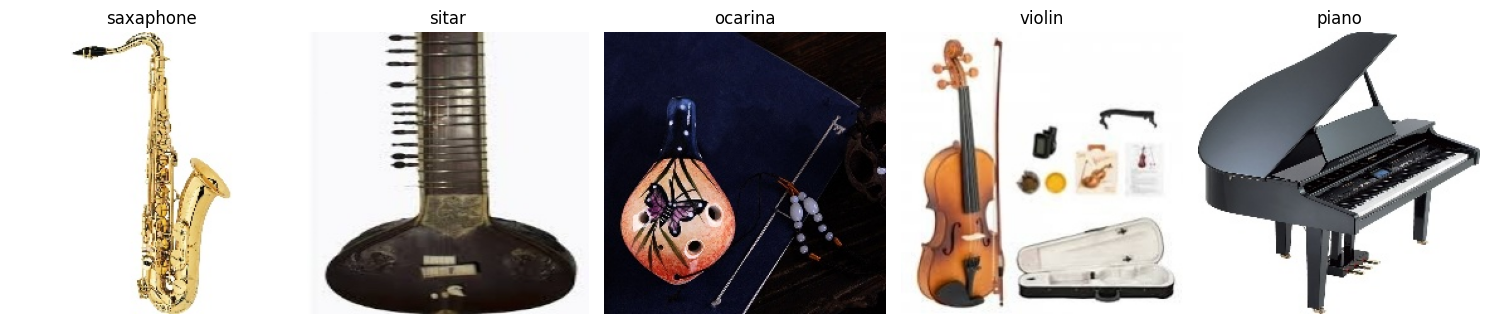

In [5]:
from tensorflow.keras.utils import load_img
from keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img

class_folders = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]

# Pick 5 random classes (or all if less than 5)
random_classes = random.sample(class_folders, min(5, len(class_folders)))

# Plot settings
plt.figure(figsize=(15, 5))

for idx, class_name in enumerate(random_classes):
    class_path = os.path.join(train_path, class_name)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if images:
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)
        img = load_img(img_path)

        plt.subplot(1, 5, idx + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Check the number of classes in the dataset
num_classes = len(class_folders)

In [7]:
# Check the number of images in each class
class_counts = {folder: len(os.listdir(os.path.join(train_path, folder))) for folder in class_folders}

In [8]:
# Plot the class distribution
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Class Names')

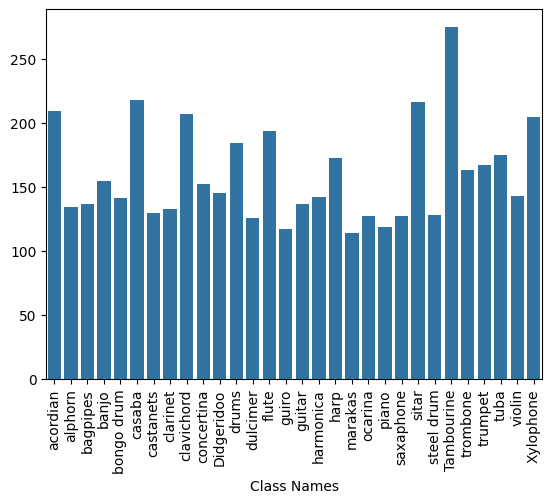

In [9]:
# Plotting the class distribution
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.xlabel('Class Names')

In [10]:
# Check the number of images in the training and test directories
train_images = len(os.listdir(train_path))
test_images = len(os.listdir(test_path))
print(f"Number of training images: {train_images}")
print(f"Number of test images: {test_images}")


Number of training images: 30
Number of test images: 30


In [11]:
# Check the number of images in each class in the training set
train_class_counts = {folder: len(os.listdir(os.path.join(train_path, folder))) for folder in class_folders}
print("Number of images in each class in the training set:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")
# Check the number of images in each class in the test set
test_class_counts = {folder: len(os.listdir(os.path.join(test_path, folder))) for folder in class_folders}
print("Number of images in each class in the test set:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images")
# Set image dimensions
img_width, img_height = 150, 150

Number of images in each class in the training set:
acordian: 209 images
alphorn: 134 images
bagpipes: 137 images
banjo: 155 images
bongo drum: 141 images
casaba: 218 images
castanets: 130 images
clarinet: 133 images
clavichord: 207 images
concertina: 152 images
Didgeridoo: 145 images
drums: 184 images
dulcimer: 126 images
flute: 194 images
guiro: 117 images
guitar: 137 images
harmonica: 142 images
harp: 173 images
marakas: 114 images
ocarina: 127 images
piano: 119 images
saxaphone: 127 images
sitar: 216 images
steel drum: 128 images
Tambourine: 275 images
trombone: 163 images
trumpet: 167 images
tuba: 175 images
violin: 143 images
Xylophone: 205 images
Number of images in each class in the test set:
acordian: 5 images
alphorn: 5 images
bagpipes: 5 images
banjo: 5 images
bongo drum: 5 images
casaba: 5 images
castanets: 5 images
clarinet: 5 images
clavichord: 5 images
concertina: 5 images
Didgeridoo: 5 images
drums: 5 images
dulcimer: 5 images
flute: 5 images
guiro: 5 images
guitar: 5 i

In [12]:
#Parameters
input_shape = (224, 224, 3)
BatchSize = 64
seed = 42
num_classes = 30

In [13]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

In [14]:
# Data Generator for Training Data
train_generator = train_datagen.flow_from_directory(train_path,
                                                      target_size=input_shape[:2],
                                                      batch_size=BatchSize,
                                                      class_mode='categorical',
                                                      seed=seed)

Found 4793 images belonging to 30 classes.


In [15]:
# Data Generator for Validation Data
validation_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# Data Generator for Validation Data
validation_generator = validation_datagen.flow_from_directory(test_path,
                                                                target_size=input_shape[:2],
                                                                batch_size=BatchSize,
                                                                class_mode='categorical',
                                                                seed=seed)

Found 150 images belonging to 30 classes.


In [17]:
# Check the class indices
class_indices = train_generator.class_indices

In [18]:
# Check the class indices
print("Class Indices:")
print(class_indices)

Class Indices:
{'Didgeridoo': 0, 'Tambourine': 1, 'Xylophone': 2, 'acordian': 3, 'alphorn': 4, 'bagpipes': 5, 'banjo': 6, 'bongo drum': 7, 'casaba': 8, 'castanets': 9, 'clarinet': 10, 'clavichord': 11, 'concertina': 12, 'drums': 13, 'dulcimer': 14, 'flute': 15, 'guiro': 16, 'guitar': 17, 'harmonica': 18, 'harp': 19, 'marakas': 20, 'ocarina': 21, 'piano': 22, 'saxaphone': 23, 'sitar': 24, 'steel drum': 25, 'trombone': 26, 'trumpet': 27, 'tuba': 28, 'violin': 29}


In [19]:
# Check the number of classes
num_classes = len(class_indices)
print("Number of Classes:")
print(num_classes)


Number of Classes:
30


In [20]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, concatenate

def inception_module(x, filters):
    # 1x1 Convolution
    conv1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    
    # 3x3 Convolution
    conv3x3 = Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv3x3)
    
    # 5x5 Convolution
    conv5x5 = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    conv5x5 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(conv5x5)
    
    # Max Pooling
    maxpool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool = Conv2D(filters[5], (1, 1), padding='same', activation='relu')(maxpool)
    
    # Concatenate all branches
    output = concatenate([conv1x1, conv3x3, conv5x5, maxpool], axis=-1)
    return output

def googlenet_v1(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    
    # Initial Convolution and MaxPooling
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # 1x1 Convolution and MaxPooling
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # Inception Modules
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    x = inception_module(x, [192, 96, 208, 16, 48, 64])
    x = inception_module(x, [160, 112, 224, 24, 64, 64])
    x = inception_module(x, [128, 128, 256, 24, 64, 64])
    x = inception_module(x, [112, 144, 288, 32, 64, 64])
    x = inception_module(x, [256, 160, 320, 32, 128, 128])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    x = inception_module(x, [256, 160, 320, 32, 128, 128])
    x = inception_module(x, [384, 192, 384, 48, 128, 128])
    
    # Average Pooling, Dropout, and Fully Connected Layer
    x = AveragePooling2D((7, 7), strides=(1, 1), padding='valid')(x)
    x = Dropout(0.4)(x)
    x = Flatten()(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    model = Model(input_layer, output_layer)
    return model

# Define the model
googlenet_model = googlenet_v1(input_shape=input_shape, num_classes=num_classes)
googlenet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │    110,784 │ conv2d_1[0][0]    │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 28, 28,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │     18,528 │ max_pooling2d_1[… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 28, 28,    │      3,088 │ max_pooling2d_1[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 28, 28,    │          0 │ max_pooling2d_1[… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │     12,352 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 28,    │    110,720 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 28, 28,    │     12,832 │ conv2d_6[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 28, 28,    │      6,176 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 28,    │          0 │ conv2d_3[0][0],   │
│ (Concatenate)       │ 256)              │            │ conv2d_5[0][0],   │
│                     │                   │            │ conv2d_7[0][0],   │
│                     │                   │            │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 28, 28,    │     32,896 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 28, 28,    │      8,224 │ concatenate[0][0] │
│                     │ 32)               │            │                 

 Total params: 6,004,302 (22.90 MB)

 Trainable params: 6,004,302 (22.90 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
googlenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [23]:
# Define the checkpoint callback to save the best model
checkpoint_path = "best_model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
# Train the model
history = googlenet_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=50,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0442 - loss: 3.4032
Epoch 1: val_accuracy improved from -inf to 0.03333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.0443 - loss: 3.4030 - val_accuracy: 0.0333 - val_loss: 3.4315 - learning_rate: 0.0010
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0518 - loss: 3.3779
Epoch 2: val_accuracy did not improve from 0.03333
75/75 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step - accuracy: 0.0518 - loss: 3.3779 - val_accuracy: 0.0333 - val_loss: 3.4328 - learning_rate: 0.0010
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0594 - loss: 3.3824
Epoch 3: val_accuracy did not improve from 0.03333
75/75 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.0594 - loss: 3.3824 - val_accuracy: 0.0333 - val_loss: 3.4233 - learning_rate: 0.0010
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0575 - loss: 3.3711
Epoch 4: val_accuracy did not improve from 0.03333
75/75 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.0575 - loss: 3.3712 - val_accuracy: 0.0333 - val_loss: 3.4142 - learning_rate: 0.0010
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 

75/75 ━━━━━━━━━━━━━━━━━━━━ 302s 4s/step - accuracy: 0.0727 - loss: 3.3216 - val_accuracy: 0.0800 - val_loss: 3.2576 - learning_rate: 5.0000e-04
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0909 - loss: 3.2511
Epoch 10: val_accuracy did not improve from 0.08000
75/75 ━━━━━━━━━━━━━━━━━━━━ 307s 4s/step - accuracy: 0.0908 - loss: 3.2510 - val_accuracy: 0.0733 - val_loss: 3.2137 - learning_rate: 5.0000e-04
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1064 - loss: 3.1828
Epoch 11: val_accuracy improved from 0.08000 to 0.08667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 405s 5s/step - accuracy: 0.1063 - loss: 3.1828 - val_accuracy: 0.0867 - val_loss: 3.1821 - learning_rate: 5.0000e-04
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.0978 - loss: 3.1636
Epoch 12: val_accuracy did not improve from 0.08667
75/75 ━━━━━━━━━━━━━━━━━━━━ 359s 5s/step - accuracy: 0.0978 - loss: 3.1634 - val_accuracy: 0.0800 - val_loss: 3.0899 - learning_rate: 5.0000e-04
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1054 - loss: 3.1187
Epoch 13: val_accuracy improved from 0.08667 to 0.12667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 377s 5s/step - accuracy: 0.1054 - loss: 3.1187 - val_accuracy: 0.1267 - val_loss: 2.9992 - learning_rate: 5.0000e-04
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1198 - loss: 3.0870
Epoch 14: val_accuracy improved from 0.12667 to 0.16667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 369s 5s/step - accuracy: 0.1198 - loss: 3.0869 - val_accuracy: 0.1667 - val_loss: 2.8835 - learning_rate: 5.0000e-04
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1196 - loss: 3.0433
Epoch 15: val_accuracy improved from 0.16667 to 0.22667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 522s 7s/step - accuracy: 0.1197 - loss: 3.0430 - val_accuracy: 0.2267 - val_loss: 2.7904 - learning_rate: 5.0000e-04
Epoch 16/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1413 - loss: 2.9747
Epoch 16: val_accuracy did not improve from 0.22667
75/75 ━━━━━━━━━━━━━━━━━━━━ 373s 5s/step - accuracy: 0.1414 - loss: 2.9748 - val_accuracy: 0.1867 - val_loss: 2.7309 - learning_rate: 5.0000e-04
Epoch 17/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1589 - loss: 2.9250
Epoch 17: val_accuracy improved from 0.22667 to 0.24000, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 365s 5s/step - accuracy: 0.1589 - loss: 2.9250 - val_accuracy: 0.2400 - val_loss: 2.6036 - learning_rate: 5.0000e-04
Epoch 18/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1661 - loss: 2.8865 
Epoch 18: val_accuracy did not improve from 0.24000
75/75 ━━━━━━━━━━━━━━━━━━━━ 965s 13s/step - accuracy: 0.1661 - loss: 2.8865 - val_accuracy: 0.2133 - val_loss: 2.6250 - learning_rate: 5.0000e-04
Epoch 19/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1762 - loss: 2.8795
Epoch 19: val_accuracy improved from 0.24000 to 0.26667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.1763 - loss: 2.8792 - val_accuracy: 0.2667 - val_loss: 2.4459 - learning_rate: 5.0000e-04
Epoch 20/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1924 - loss: 2.8272
Epoch 20: val_accuracy did not improve from 0.26667
75/75 ━━━━━━━━━━━━━━━━━━━━ 373s 5s/step - accuracy: 0.1924 - loss: 2.8272 - val_accuracy: 0.2467 - val_loss: 2.5021 - learning_rate: 5.0000e-04
Epoch 21/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2049 - loss: 2.7840
Epoch 21: val_accuracy improved from 0.26667 to 0.30667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 368s 5s/step - accuracy: 0.2048 - loss: 2.7839 - val_accuracy: 0.3067 - val_loss: 2.4029 - learning_rate: 5.0000e-04
Epoch 22/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2249 - loss: 2.7108
Epoch 22: val_accuracy improved from 0.30667 to 0.33333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 365s 5s/step - accuracy: 0.2249 - loss: 2.7109 - val_accuracy: 0.3333 - val_loss: 2.3119 - learning_rate: 5.0000e-04
Epoch 23/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2224 - loss: 2.7049
Epoch 23: val_accuracy improved from 0.33333 to 0.40667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 368s 5s/step - accuracy: 0.2224 - loss: 2.7048 - val_accuracy: 0.4067 - val_loss: 2.2408 - learning_rate: 5.0000e-04
Epoch 24/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2325 - loss: 2.6517
Epoch 24: val_accuracy did not improve from 0.40667
75/75 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.2326 - loss: 2.6516 - val_accuracy: 0.3533 - val_loss: 2.2904 - learning_rate: 5.0000e-04
Epoch 25/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2583 - loss: 2.5785
Epoch 25: val_accuracy did not improve from 0.40667
75/75 ━━━━━━━━━━━━━━━━━━━━ 304s 4s/step - accuracy: 0.2583 - loss: 2.5788 - val_accuracy: 0.3333 - val_loss: 2.3136 - learning_rate: 5.0000e-04
Epoch 26/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2658 - loss: 2.5727
Epoch 26: val_accuracy did not improve from 0.40667
75/75 ━━━━━━━━━━━━━━━━━━━━ 312s 4s/step - accuracy: 0.2657 - loss: 2.5728 - val_accuracy: 0.3800 - val_loss: 2.0771 - learning_rate: 5.0000e-04
Epoch 27/50
75/7

75/75 ━━━━━━━━━━━━━━━━━━━━ 307s 4s/step - accuracy: 0.2911 - loss: 2.4749 - val_accuracy: 0.4333 - val_loss: 1.9774 - learning_rate: 5.0000e-04
Epoch 29/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3035 - loss: 2.4158
Epoch 29: val_accuracy did not improve from 0.43333
75/75 ━━━━━━━━━━━━━━━━━━━━ 305s 4s/step - accuracy: 0.3036 - loss: 2.4157 - val_accuracy: 0.4200 - val_loss: 1.9515 - learning_rate: 5.0000e-04
Epoch 30/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3085 - loss: 2.3804
Epoch 30: val_accuracy did not improve from 0.43333
75/75 ━━━━━━━━━━━━━━━━━━━━ 307s 4s/step - accuracy: 0.3087 - loss: 2.3799 - val_accuracy: 0.4333 - val_loss: 1.8674 - learning_rate: 5.0000e-04
Epoch 31/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3382 - loss: 2.3086
Epoch 31: val_accuracy did not improve from 0.43333
75/75 ━━━━━━━━━━━━━━━━━━━━ 308s 4s/step - accuracy: 0.3381 - loss: 2.3092 - val_accuracy: 0.4267 - val_loss: 1.8042 - learning_rate: 5.0000e-04
Epoch 32/50
75/7

75/75 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.3804 - loss: 2.1770 - val_accuracy: 0.5000 - val_loss: 1.6863 - learning_rate: 5.0000e-04
Epoch 34/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3888 - loss: 2.0752
Epoch 34: val_accuracy did not improve from 0.50000
75/75 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.3887 - loss: 2.0756 - val_accuracy: 0.5000 - val_loss: 1.6047 - learning_rate: 5.0000e-04
Epoch 35/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3947 - loss: 2.0654
Epoch 35: val_accuracy improved from 0.50000 to 0.52000, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.3947 - loss: 2.0653 - val_accuracy: 0.5200 - val_loss: 1.4962 - learning_rate: 5.0000e-04
Epoch 36/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4338 - loss: 2.0019
Epoch 36: val_accuracy improved from 0.52000 to 0.59333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.4338 - loss: 2.0015 - val_accuracy: 0.5933 - val_loss: 1.3667 - learning_rate: 5.0000e-04
Epoch 37/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4394 - loss: 1.8986
Epoch 37: val_accuracy did not improve from 0.59333
75/75 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.4393 - loss: 1.8990 - val_accuracy: 0.5933 - val_loss: 1.3734 - learning_rate: 5.0000e-04
Epoch 38/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4426 - loss: 1.8648
Epoch 38: val_accuracy improved from 0.59333 to 0.61333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.4425 - loss: 1.8653 - val_accuracy: 0.6133 - val_loss: 1.2798 - learning_rate: 5.0000e-04
Epoch 39/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4654 - loss: 1.8662
Epoch 39: val_accuracy improved from 0.61333 to 0.62000, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.4653 - loss: 1.8663 - val_accuracy: 0.6200 - val_loss: 1.3226 - learning_rate: 5.0000e-04
Epoch 40/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4834 - loss: 1.8040
Epoch 40: val_accuracy did not improve from 0.62000
75/75 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.4834 - loss: 1.8037 - val_accuracy: 0.6200 - val_loss: 1.3223 - learning_rate: 5.0000e-04
Epoch 41/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4941 - loss: 1.7520
Epoch 41: val_accuracy did not improve from 0.62000
75/75 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.4940 - loss: 1.7522 - val_accuracy: 0.6133 - val_loss: 1.3849 - learning_rate: 5.0000e-04
Epoch 42/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5248 - loss: 1.5926
Epoch 42: val_accuracy improved from 0.62000 to 0.64000, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.5248 - loss: 1.5927 - val_accuracy: 0.6400 - val_loss: 1.1426 - learning_rate: 2.5000e-04
Epoch 43/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5441 - loss: 1.5262
Epoch 43: val_accuracy improved from 0.64000 to 0.69333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.5441 - loss: 1.5265 - val_accuracy: 0.6933 - val_loss: 0.9933 - learning_rate: 2.5000e-04
Epoch 44/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5433 - loss: 1.5032
Epoch 44: val_accuracy did not improve from 0.69333
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5433 - loss: 1.5034 - val_accuracy: 0.6600 - val_loss: 1.1025 - learning_rate: 2.5000e-04
Epoch 45/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5697 - loss: 1.4834
Epoch 45: val_accuracy did not improve from 0.69333
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5695 - loss: 1.4836 - val_accuracy: 0.6667 - val_loss: 1.0988 - learning_rate: 2.5000e-04
Epoch 46/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5666 - loss: 1.4244
Epoch 46: val_accuracy did not improve from 0.69333
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.5665 - loss: 1.4250 - val_accuracy: 0.6933 - val_loss: 0.9907 - learning_rate: 2.5000e-04
Epoch 47/50
75/7

75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.5739 - loss: 1.4329 - val_accuracy: 0.7067 - val_loss: 1.0277 - learning_rate: 2.5000e-04
Epoch 48/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5844 - loss: 1.3869
Epoch 48: val_accuracy did not improve from 0.70667
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.5844 - loss: 1.3870 - val_accuracy: 0.7000 - val_loss: 1.0654 - learning_rate: 2.5000e-04
Epoch 49/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5886 - loss: 1.3818
Epoch 49: val_accuracy improved from 0.70667 to 0.72667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.5886 - loss: 1.3820 - val_accuracy: 0.7267 - val_loss: 1.0765 - learning_rate: 2.5000e-04
Epoch 50/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6066 - loss: 1.3115
Epoch 50: val_accuracy improved from 0.72667 to 0.74000, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6066 - loss: 1.3116 - val_accuracy: 0.7400 - val_loss: 0.8909 - learning_rate: 1.2500e-04


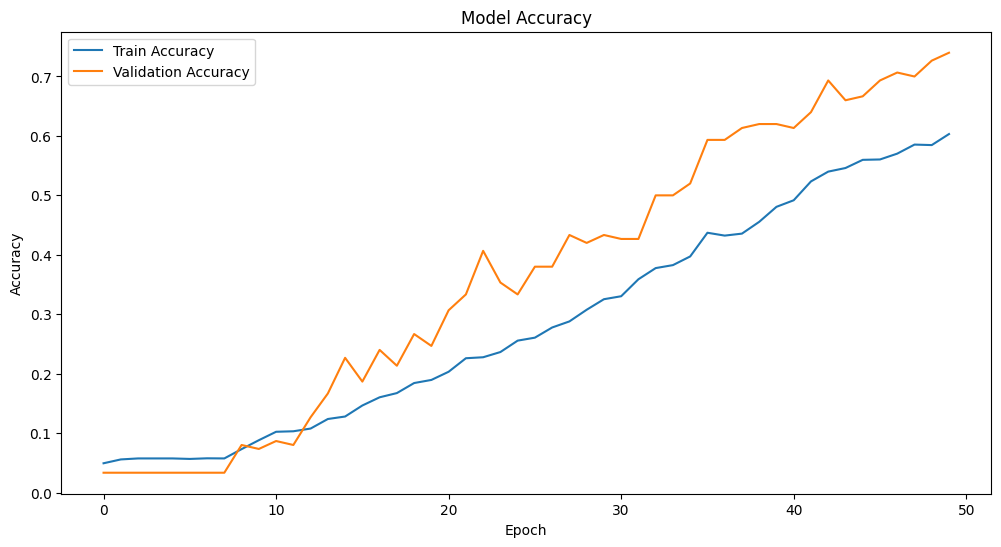

In [24]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


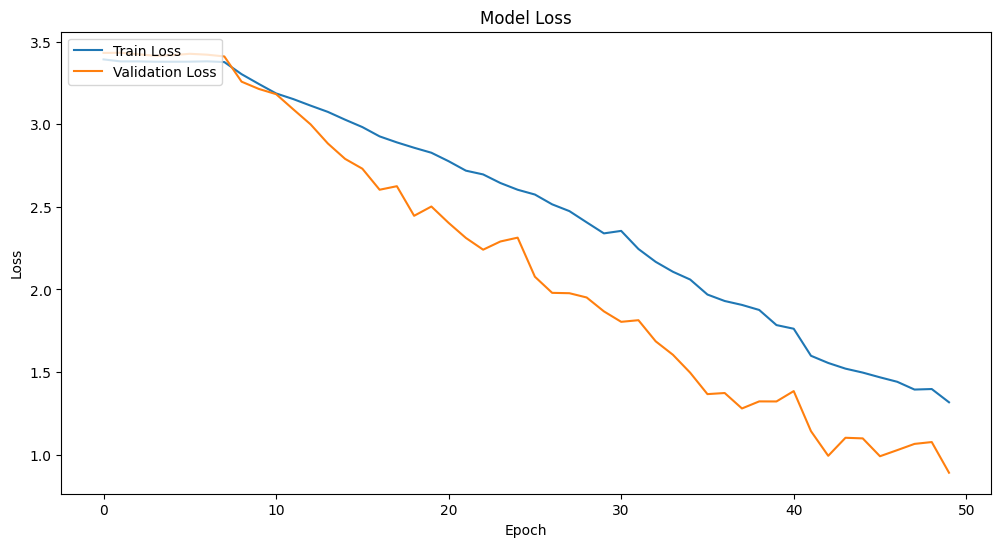

In [25]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [26]:
# Load the best model
from keras.models import load_model
best_model = load_model(checkpoint_path)
# Evaluate the model on the validation set
validation_loss, validation_accuracy = best_model.evaluate(validation_generator, verbose=1)
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")
# Make predictions on the validation set
predictions = best_model.predict(validation_generator, verbose=1)
# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)
# Get the true class indices
true_classes = validation_generator.classes
# Get the class labels
class_labels = list(validation_generator.class_indices.keys())



3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.7352 - loss: 0.8773
Validation Loss: 0.8909447193145752
Validation Accuracy: 0.7400000095367432
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate TP, TN, FP, FN for each class
for i, class_label in enumerate(class_labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    print(f"\nClass: {class_label}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

Confusion Matrix:
[[0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0